In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Colab Notebooks/data_analysis_2025/07. 유형별 머신러닝

/content/gdrive/MyDrive/Colab Notebooks/data_analysis_2025/07. 유형별 머신러닝


# 라이브러리 선언

In [97]:
import pandas as pd
import numpy as np

In [98]:
# 데이터 로드
dataPath = 'https://raw.githubusercontent.com/hyokwan/python-lecture/refs/heads/master/dataset/cars.csv'
carData = pd.read_csv(dataPath)

In [99]:
carData

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438
...,...,...,...,...,...,...
958,22,0,11,8778,9829,1593
959,19,1,23,4850,3470,4742
960,28,1,28,9312,2720,12771
961,50,0,29,51343,8713,28511


In [23]:
carData.columns

Index(['age', 'gender', 'miles', 'debt', 'income', 'sales'], dtype='object')

### 컬럼 정보
age : 나이  
gender : 성별  
miles : 하루 평균 운전거리  
debt : 개인부채  
income : 월수입  
sales : 차 구매 시 소비 금액

# 1. 타입 통합 / 특성 숫자컬럼 추가

In [100]:
### 타입 통합
### 특성 숫자컬럼 추가(성별-> 0,1)

In [101]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     963 non-null    int64
 1   gender  963 non-null    int64
 2   miles   963 non-null    int64
 3   debt    963 non-null    int64
 4   income  963 non-null    int64
 5   sales   963 non-null    int64
dtypes: int64(6)
memory usage: 45.3 KB


In [102]:
carData.describe()

,age,gender,miles,debt,income,sales
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,37.971963,0.512980,27.704050,14109.004154,6176.047767,11689.860852
std,12.290838,0.500091,13.378181,18273.702481,3260.670142,8986.896921
min,19.000000,0.000000,10.000000,0.000000,0.000000,500.000000
25%,27.000000,0.000000,20.000000,1475.000000,3506.500000,3554.000000
50%,37.000000,1.000000,25.000000,6236.000000,6360.000000,9130.000000
75%,49.000000,1.000000,32.000000,16686.000000,8649.500000,19245.000000
max,60.000000,1.000000,97.000000,59770.000000,11970.000000,29926.000000


# 2. 특성 선정 / 데이터 분리

### 2-1. 특성 선정

In [53]:
# 분석에 사용할 특성
corrDf = carData.corr()
corrDf

,age,gender,miles,debt,income,sales
age,1.000000,-0.000702,0.232399,0.218896,0.239644,0.352609
gender,-0.000702,1.000000,-0.031355,-0.033181,-0.034317,-0.036350
miles,0.232399,-0.031355,1.000000,0.544791,0.422141,0.636676
debt,0.218896,-0.033181,0.544791,1.000000,0.491790,0.835541
income,0.239644,-0.034317,0.422141,0.491790,1.000000,0.674685
sales,0.352609,-0.036350,0.636676,0.835541,0.674685,1.000000


In [105]:
stdCorr = 0.3
label = ["sales"]
features = list( corrDf.loc[ (abs( corrDf.sales) >= stdCorr) &
                             (abs( corrDf.sales) != 1)    ].index )
print( f"문제지 {features}, 정답지: {label} " )

문제지 ['age', 'miles', 'debt', 'income'], 정답지: ['sales'] 


### 2-2. 데이터 분리

In [106]:
from sklearn.model_selection import train_test_split

trainData, testData = train_test_split(carData, test_size=0.3, random_state=10)

In [142]:
# 훈련데이터
trainFeatures = trainData.loc[:,features]
trainLabel = trainData.loc[:, label]
# 테스트데이터
testFeatures = testData.loc[:, features]
testLabel = testData.loc[:, label]

testDataAll = testData
trainDataAll = trainData
print(trainDataAll.shape, testDataAll.shape)

(674, 6) (289, 6)


In [143]:
print(trainFeatures.shape, trainLabel.shape)
print(testFeatures.shape, testLabel.shape)

(674, 4) (674, 1)
(289, 4) (289, 1)


# 3. 모델 적용

### 3-1. 모델 학습

In [133]:
# 트리 모델
from sklearn.tree import DecisionTreeRegressor

# 모델 선언
dt = DecisionTreeRegressor(max_depth=10, random_state=10)

# 모델 학습
fittedDtModel = dt.fit(X=trainFeatures, y=trainLabel)

In [134]:
# 랜덤포레스트 모델
from sklearn.ensemble import RandomForestRegressor

# 모델 선언
rf = RandomForestRegressor(n_estimators=50, random_state=10)

# 모델 학습
fittedRfModel = rf.fit(X=trainFeatures, y=trainLabel)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### ⭐⭐⭐ 모델 중에 좌표를 찍고계산하는 모델은 특성(문제지) 높이를 전부 맞춰줘야 한다 ⭐⭐⭐

In [135]:
# 선형회귀 모델
from sklearn.linear_model import LinearRegression

# 모델 선언
lr = LinearRegression()

# 모델 학습
fittedLrModel = lr.fit(X=trainFeatures, y=trainLabel)

In [123]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

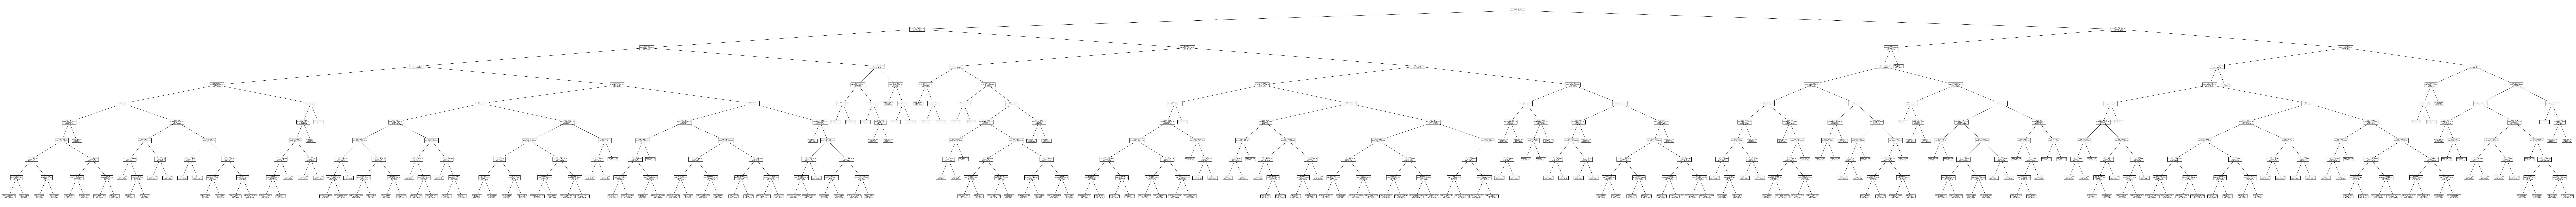

In [132]:
plt.figure(figsize=(250,20))
plot_tree(fittedDtModel)
plt.savefig("./plt_dt.png")

# 4. 예측

### 4-1. 예측

In [136]:
dtPredict = fittedDtModel.predict(testFeatures)

In [137]:
rfPredict = fittedRfModel.predict(testFeatures)

In [138]:
lrPredict = fittedLrModel.predict(testFeatures)

In [152]:
depth1 = trainDataAll.loc[trainDataAll.debt <= 10118]
depth1.shape

(489, 6)

In [156]:
depth2 = depth1.loc[depth1.income > 5079.5 ]
depth2.shape

(241, 6)

In [157]:
depth3 = depth2.loc[depth2.age <= 24.5 ]
depth3.shape

(26, 6)

In [159]:
depth4 = depth3.loc[depth3.income <= 5688]
depth4.shape

(3, 6)

In [160]:
depth5 = depth4.loc[depth4.miles <= 17]
depth5.shape

(1, 6)

In [145]:
testDataAll["DT_PREDICT_VALUE"] = dtPredict
testDataAll["RF_PREDICT_VALUE"] = rfPredict
testDataAll["LR_PREDICT_VALUE"] = lrPredict

In [147]:
testDataAll.head()

,age,gender,miles,debt,income,sales,DT_PREDICT_VALUE,RF_PREDICT_VALUE,LR_PREDICT_VALUE
456,25,0,33,37689,8869,19247,22188.000000,20752.50,20053.458882
615,38,1,17,8095,1723,12886,7792.363636,8396.24,5159.579445
753,48,0,21,709,1420,4894,3859.333333,5284.82,4149.983824
943,28,0,25,47406,10518,28119,26627.000000,25818.38,23508.450675
27,26,0,10,1971,9754,5222,2856.000000,6168.40,8039.564919


# 5. 데이터 정리

### 5-1. 모델별 예측값 정리

In [113]:
testLabel["DT_PREDICT_VALUE"] = dtPredict
testLabel["RF_PREDICT_VALUE"] = rfPredict

In [114]:
testLabel.head()

,sales,DT_PREDICT_VALUE,RF_PREDICT_VALUE
456,19247,22188.000000,20752.50
615,12886,7792.363636,8396.24
753,4894,3859.333333,5284.82
943,28119,26627.000000,25818.38
27,5222,2856.000000,6168.40


### 5-2. RMSE, MAE 값 확인

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

dt_mse = mean_squared_error(testLabel["sales"], testLabel["DT_PREDICT_VALUE"])
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(testLabel["sales"], testLabel["DT_PREDICT_VALUE"])

rf_mse = mean_squared_error(testLabel["sales"], testLabel["RF_PREDICT_VALUE"])
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(testLabel["sales"], testLabel["RF_PREDICT_VALUE"])

In [119]:
print(f"트리 모델 rmse: {dt_rmse}, mae: {dt_mae}")
print(f"랜덤포레스트 모델 rmse: {rf_rmse}, mae: {rf_mae}")

트리 모델 rmse: 4152.122684694519, mae: 2532.5580023268353
랜덤포레스트 모델 rmse: 3026.800257570765, mae: 1915.981730103806
